In [ ]:
#Installation of pmdarima for ARIMA model to run
pip install pmdarima

In [1]:
#Importing required libraries like pandas, numpy.
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

In [3]:
#Loading the excel data into the dataframe. Date column is marked as index and it is also parsed that way Python recognizes that column as date variable
#Printing the data to look at the shape
df = pd.read_excel(r'H:\Demand Forecasting\Data\Spend\Data v4\Data_BM.xlsx',index_col='date', parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df.tail()

Shape of data (165, 7)


,business_unit,product,country,month,year,qty,amt
date,,,,,,,
2022-05-29,Automotive,Base Metals,United States,May,2022,462,5028908
2022-06-05,Automotive,Base Metals,United States,June,2022,477,6018685
2022-06-12,Automotive,Base Metals,United States,June,2022,476,5822638
2022-06-19,Automotive,Base Metals,United States,June,2022,467,5499921
2022-06-26,Automotive,Base Metals,United States,June,2022,470,5629392


In [4]:
#Since ARIMA needs only 'date' and 'amt' column, all other columns are removed which is not necessary
df.drop(["business_unit","country","qty","month","year","product"], axis=1, inplace=True)
df.head()

,amt
date,
2019-05-05,5003053
2019-05-12,4665940
2019-05-19,5545590
2019-05-26,5692459
2019-06-02,5125903


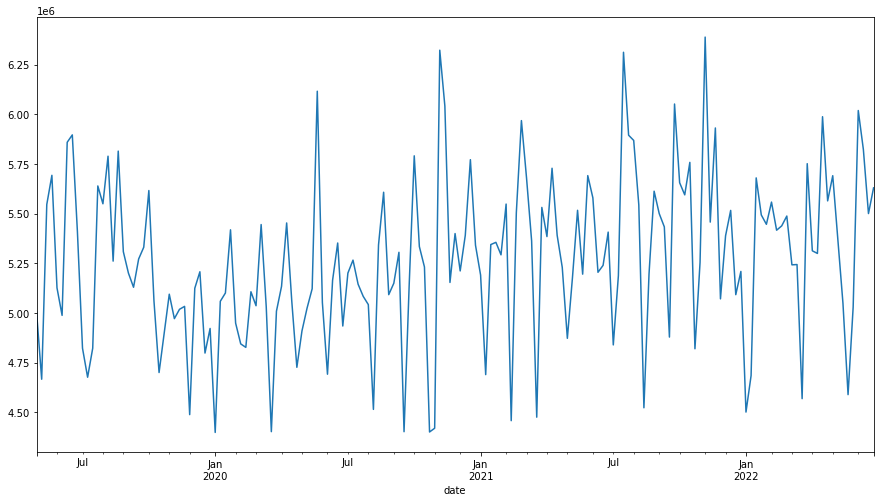

In [5]:
#Plotting the data into a line chart to visualize it better
df['amt'].plot(figsize=(15,8))

In [6]:
#Doing a Augmented Dickey Fuller test to check the stationary of the data. If the p-value is lesser than 0.05, then it is stationary
#Here we see that the data is not stationary since the ADF p-value is 0.37
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['amt'])

1. ADF :  -1.801318519567991
2. P-Value :  0.3798072820079655
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression: 155
5. Critical Values :
	 1% :  -3.4732590518613002
	 5% :  -2.880374082105334
	 10% :  -2.5768120811654525


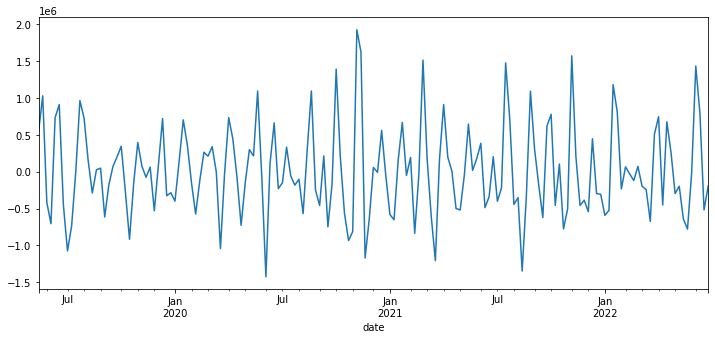

In [7]:
#Since the data is not stationary, we introduce a differenciation function to make the data stationary. A period of 2 is selected for differenciation
df1=df.diff(periods=2)
df1=df1.dropna()
df1.head()
df1['amt'].plot(figsize=(12,5))

In [8]:
#Checking the p-value for stationarity through ADF and now it is seen that the p-value is less than 0.05
ad_fuller_result_1 = adfuller(df1['amt'])

print('amt')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

amt
ADF Statistic: -9.926454554541317
p-value: 2.8983333570950085e-17


In [9]:
#Importing AutoArima libraries
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Running the data into ARIMA model. ARIMA tries to run the model through multiple iteration to check for the lowest AIC. The lowest AIC is 5,0,3
stepwise_fit = auto_arima(df1['amt'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4686.252, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4812.795, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4811.079, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4767.064, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4810.829, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=4692.724, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4725.196, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=4682.200, Time=0.40 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=4726.260, Time=0.23 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=4674.209, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=4686.591, Time=0.23 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=4672.407, Time=0.37 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=4684.358, Time=0.36 sec
 ARIMA(5,0,3)(0,0,0)[0] intercept   : AIC=4671.142, Time=0.46 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept

In [11]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  163
Model:               SARIMAX(5, 0, 3)   Log Likelihood               -2325.579
Date:                Mon, 08 Aug 2022   AIC                           4669.157
Time:                        23:38:50   BIC                           4697.001
Sample:                             0   HQIC                          4680.462
                                - 163                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1256      0.448      0.280      0.779      -0.752       1.003
ar.L2         -0.2802      0.090     -3.111      0.002      -0.457      -0.104
ar.L3         -0.0404      0.184     -0.219      0.827      -0.402       0.321
ar.L4         -0.2535      0.116     -2.179      0.029      -0.482      -0.025
ar.L5          0.1908      0.149      1.285      0.199      -0.100       0.482
ma.L1          0.1196      0.475      0.252      0.801      -0.811       1.051
ma.L2         -0.8643      0.089     -9.732      0.000      -1.038      -0.690
ma.L3         -0.0594      0.395     -0.150      0.880      -0.833       0.715
sigma2      1.398e+11   3.31e-12   4.22e+22      0.000     1.4e+11     1.4e+11
===================================================================================
Ljung-Box (Q):                       47.82   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.18   Prob(JB):                         0.67
Heteroskedasticity (H):               1.36   Skew:                             0.04
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.61e+39. Standard errors may be unstable.
"""

In [12]:
from statsmodels.tsa.arima_model import ARIMA

In [13]:
df1=df

In [14]:
#Splitting the Training and Test data
print(df.shape)
train=df.iloc[:-4]
test=df.iloc[-4:]
print(train.shape,test.shape)

(165, 1)
(161, 1) (4, 1)


In [15]:
#As 5,0,3 is the best model, that model is now used to fit the data
model=ARIMA(train['amt'],order=(5,0,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    amt   No. Observations:                  161
Model:                     ARMA(5, 3)   Log Likelihood               -2288.843
Method:                       css-mle   S.D. of innovations         357199.700
Date:                Mon, 08 Aug 2022   AIC                           4597.686
Time:                        23:39:23   BIC                           4628.500
Sample:                    05-05-2019   HQIC                          4610.197
                         - 05-29-2022                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.252e+06   7.22e+04     72.697      0.000    5.11e+06    5.39e+06
ar.L1.amt      0.8038      0.089      9.077      0.000       0.630       0.977
ar.L2.amt     -0.8845      0.100     -8.806      0.000      -1.081      -0.688
ar.L3.amt      1.0105      0.097     10.469      0.000       0.821       1.200
ar.L4.amt     -0.3703      0.097     -3.804      0.000      -0.561      -0.179
ar.L5.amt      0.3499      0.078      4.465      0.000       0.196       0.503
ma.L1.amt     -0.5493      0.061     -9.030      0.000      -0.669      -0.430
ma.L2.amt      0.6725      0.058     11.654      0.000       0.559       0.786
ma.L3.amt     -0.8657      0.071    -12.169      0.000      -1.005      -0.726
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0368           -0.0000j            1.0368           -0.0000
AR.2           -0.3555           -1.1111j            1.1666           -0.2993
AR.3           -0.3555           +1.1111j            1.1666            0.2993
AR.4            0.3663           -1.3753j            1.4233           -0.2086
AR.5            0.3663           +1.3753j            1.4233            0.2086
MA.1           -0.1742           -0.9981j            1.0132           -0.2775
MA.2           -0.1742           +0.9981j            1.0132            0.2775
MA.3            1.1253           -0.0000j            1.1253           -0.0000
-----------------------------------------------------------------------------
"""

In [16]:
#ARIMA is run on the Training dataset and then predicted for the test data
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=df.index[start:end+1]
#pred.columns=['index','amt_predicted']
#pred["amt"] = pred["amt"].astype("int64")
print(pred)

date
2022-06-05    5.506774e+06
2022-06-12    5.343035e+06
2022-06-19    5.298825e+06
2022-06-26    5.316986e+06
Name: ARIMA Predictions, dtype: float64


In [17]:
file_name = 'ARIMA_Predictions.xlsx'
pred.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [19]:
pred2 = pd.read_excel('H:/Demand Forecasting/Data/Spend/Data v4/ARIMA_Predictions.xlsx',index_col='date')
print('Shape of data',pred2.shape)
pred2.head()

Shape of data (4, 1)


,ARIMA Predictions
date,
2022-06-05,5506774
2022-06-12,5343035
2022-06-19,5298825
2022-06-26,5316986


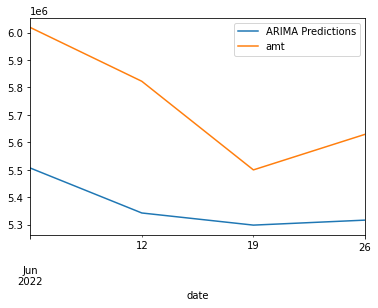

In [20]:
#Both the test data and the predicted data is plotted on a line chart for comparison
pred2.plot(legend=True)
test['amt'].plot(legend=True)

In [21]:
#Figuring out the Average of the test data for RMSE
Average=test['amt'].mean()
print(Average)

5742659.0


In [22]:
#RMSE of predicted data
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred2,test['amt']))
print(rmse)

396897.0331150133


In [23]:
#Accuracy of the model
Accuracy=(rmse/Average)*100
Accuracy=100-Accuracy
print(Accuracy)

93.0886191724946
